In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import random

In [2]:
image = cv2.imread('data/train/' + str(random.randint(1,33402))+ '.png')
#image = cv2.imread('data/train/5485.png')
image_copy = copy.copy(image)
image_copy2 = copy.copy(image)
height = image.shape[0]
width = image.shape[1]

In [3]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [4]:

thresh = cv2.adaptiveThreshold(gray, 255, 1, 1, 11, 2)


In [5]:

# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# opening the image
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# closing the image
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)

In [6]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

sharp = cv2.filter2D(gray,-1, kernel) 


bfilter = cv2.bilateralFilter(gray,11,17,17)


# Find Canny edges
edged = cv2.Canny(bfilter, 30, 200)


In [7]:
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


In [8]:
digit_contours = []
for contour in contours:
    [x, y, w, h] = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
    if ( (h*w > 0.015*height*width) and (y<0.5*height) and (0.25*width< x <0.75*width)):
        digit_contours.append(contour)
        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 1)

cv2.drawContours(image, contours, -1, (0,255,0), 1)
cv2.drawContours(image_copy, digit_contours, -1, (0,255,0), 1)


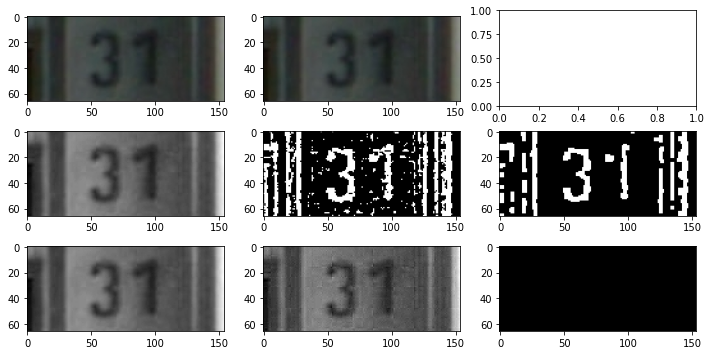

In [9]:
f, axarr = plt.subplots(3,3, figsize=(12, 6))
axarr[0,0].imshow(image)
axarr[0,1].imshow(image_copy)
axarr[1,0].imshow(gray, cmap='gray')
axarr[1,1].imshow(thresh, cmap='gray')
axarr[1,2].imshow(closing, cmap='gray')
axarr[2,0].imshow(gray, cmap='gray')
axarr[2,1].imshow(sharp, cmap='gray')
axarr[2,2].imshow(edged, cmap='gray')
